# Quickstart


The best way to get started using `Tweezepy` is to use it for a project. Here's an annotated fully-functional example that demonstrates standard usage. 

For new Python users, this example is carried out in a Jupyter notebook. If you have Jupyter installed, you can download and run the notebook locally (using the download option in the header above) or run it online using Binder (also in the header above).

## Load in data

Standard usage of ``Tweezepy`` takes in a 1D array of bead positions in nm, trace, collected at a known sampling frequency, fsample. There are many ways to load data into Python depending on its format. [Here](https://cmdlinetips.com/2018/01/how-to-read-a-numerical-data-file-in-python-with-numpy/) is a quick tutorial for how to load in data from csv files.

For this tutorial, we will use an example trajectory that is included with ``Tweezepy``. The sampling frequency for this data was 400 Hz.

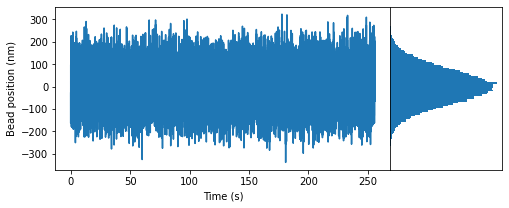

In [3]:
import numpy as np # Loads the numpy package
import matplotlib.pyplot as plt # Loads the matplotlib package for plotting
from tweezepy.smmcalibration import load_trajectory # Loads in the exampled trajectory in tweezepy
fsample = 400 # sampling frequency in Hz
trace = load_trajectory() # load in trajectory in nm
N = len(trace) # number of points in trajectory
time = np.arange(N)/fsample # time in s
fig,ax = plt.subplots(figsize=(8,3), # Figure size
                      ncols=2, # number of columns in figure
                      gridspec_kw={'width_ratios':[3,1], # width ratio of columns
                                   'wspace':0}) # space between columns
ax[0].plot(time, trace) # Plot bead positions as a function of time
ax[1].hist(trace, bins=100, orientation = 'horizontal') # Plot histogram of bead positions
ax[0].set_xlabel('Time (s)') # Label x axis
ax[0].set_ylabel('Bead position (nm)') # Label yaxis
ax[1].set_xticks([]) # Remove xticks on histogram axis
ax[1].set_yticks([]); # Remove yticks on historgram axis

The plot above shows the bead positions at each time point in the example trajectory and a histogram of the bead positions.

## Using the power spectral density (PSD) method
The power spectral density (PSD) method is used via the `PSD` class. Use Python's built-in help function to see the class's docstring, including all its expected inputs (parameters) and available methods. To do so, type the following:

```python
help(PSD)
```

### Estimating the PSD of a trajectory
To estimate the PSD of a trajectory, input the trajectory (in nm) and sampling frequency (in Hz) into the `PSD` class. By default, it uses Welch's method, splitting the trajectory into three half-overlapping bins, calculating the PSD values for each bin, and averaging them together to reduce noise. The resulting PSD values are stored in a dictionary that can be directly accessed via the data attribute.

In [5]:
from tweezepy.smmcalibration import PSD # Load in PSD class
psd = PSD(trace,fsample) # Estimate PSD values
for key, value in psd.data.items():
    print(key, ' : ', value)

x  :  [7.81250000e-03 1.56250000e-02 2.34375000e-02 ... 1.99976562e+02
 1.99984375e+02 1.99992188e+02]
shape  :  [3. 3. 3. ... 3. 3. 3.]
y  :  [2.36022201e+02 3.37331831e+02 2.30037921e+02 ... 2.84133014e-01
 5.72460759e-01 8.58512762e-01]
yerr  :  [1.36267481e+02 1.94758624e+02 1.32812456e+02 ... 1.64044272e-01
 3.30510373e-01 4.95662574e-01]


### Fitting a model to the estimated PSD using maximum likelihood estimation (MLE)

To fit a model to the estimated PSD and estimate parameters, use the mlefit method in the `PSD` class. By default, it uses the analytical function from Eq. 7 in Morgan and Saleh (2021) and Lansdorp and Saleh (2012) which assumes zero dead-time and accounts for aliasing and motion blur. As with the data, the resulting parameters and their associated uncertainties are stored in a dictionary, which can be accessed directly through the results attribute.

In [6]:
psd.mlefit() # Perform MLE fit on data
for key, value in psd.results.items():
    print(key, ' : ', value)

chi2  :  208597.91145770502
redchi2  :  8.1493109136893
g  :  1.0010433861570223e-05
g_error  :  5.533212958186252e-08
k  :  0.0006333567283668794
k_error  :  8.130228755790836e-06
support  :  1.0
p-value  :  0.0
AIC  :  89948.62650857156
AICc  :  89948.62697739482


The PSD values and MLE fit can also be plotted via the built-in plotting method.

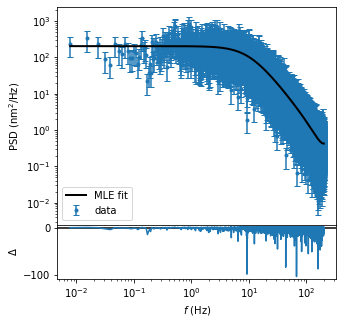

In [7]:
fig,ax = psd.plot(data_label='data',fit_label = 'MLE fit') # Plot PSD values and MLE fit
ax[0].legend() # Add legend to upper axis

Lastly, when using the `PSD` class there is an optional ``bins`` parameter, which determines the number of half-overlapping bins to use. More bins reduces noise at the cost of low frequency resolution. For example, here is the estimated PSD values using 5, 15, or 25 half-overlapping bins.

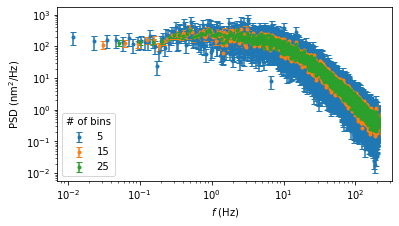

In [8]:
bins = [5,15,25] # number of half-overlapping bins
fig = plt.figure() # figure setup
for b in bins:
    psd = PSD(trace,fsample = fsample,  bins=b) # estimate PSD values
    fig, ax = psd.plot(fig=fig,data_label=b) # plot PSD values
ax[0].legend(title = '# of bins') # add legend to axis

## Using the Allan variance (AV) method
The Allan Variance (AV) method is used via the `AV` class. You can use the built-in help() function to print the class's docstring, which includes a description of all its inputs (parameters) and methods. To do so, type the following:

```python
help(AV)
```

### Estimating the AV of a trajectory
To estimate AV values, input the trajectory (in nm) and sampling frequency (in Hz) into the `AV` class. The estimated AV values are stored in a dictionary that can be accessed via the data attribute. By default, the `AV` class uses the overlapping AV, octave spaced samples, and calculates the type of noise and equivalent degrees of freedom. Because the AV method uses logarithmically spaced bins, there is no optional bins parameter, somewhat simplifying its use for force calibration. 

In [9]:
from tweezepy.smmcalibration import AV # Load in AV class
av = AV(trace,fsample) # Estimate AV values
for key, value in av.data.items():
    print(key, ' : ', value)

x  :  [2.500e-03 5.000e-03 1.000e-02 2.000e-02 4.000e-02 8.000e-02 1.600e-01
 3.200e-01 6.400e-01 1.280e+00 2.560e+00 5.120e+00 1.024e+01 2.048e+01
 4.096e+01]
shape  :  [3.90583820e+04 2.19038208e+04 1.12664407e+04 5.67381938e+03
 2.14800855e+03 1.06986415e+03 5.32777801e+02 2.66111158e+02
 1.32777871e+02 6.61112985e+01 3.27781570e+01 1.61118881e+01
 7.77941176e+00 3.78125000e+00 1.78571429e+00]
y  :  [ 607.28884303 1081.44344278 1725.8873072  2295.80653154 2362.37579231
 1791.55502062 1134.34404209  657.39308939  354.5921528   158.06307178
   62.49896924   29.20585681   15.19484232   10.18525082    5.95160116]
yerr  :  [ 3.07282748  7.30708017 16.25994484 30.47877682 50.97191858 54.77291233
 49.14413936 40.29893717 30.77274727 19.43983499 10.91642887  7.27606773
  5.44782086  5.23786176  4.45377049]


### Fitting a model to the estimated AV using maximum likelihood estimation (MLE)
To fit a model to the estimated AV values, use the mlefit method of the `AV` class. By default, it performs MLE using the analytical function from Eq. 9 in Morgan and Saleh (2021) or Eq. 17 in Lansdorp and Saleh (2012). After fitting, the parameters and their associated uncertainties can be accessed directly from the results attribute. 

In [10]:
av.mlefit() # Perform MLE fit on AV data
for key, value in av.results.items():
    print(key, ' : ', value)

chi2  :  14.346818631382492
redchi2  :  1.1036014331832686
g  :  1.0041155314204818e-05
g_error  :  6.68802889807011e-08
k  :  0.0006360035178028457
k_error  :  7.325143945228793e-06
support  :  0.999911671324171
p-value  :  3.1085352224861228e-61
AIC  :  126.52377592444978
AICc  :  127.52377592444978


We can also plot the AV values and MLE fit using the built-in plotting method.

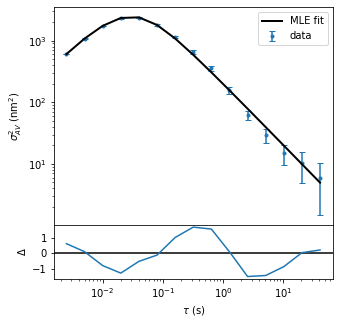

In [11]:
fig,ax = av.plot(data_label='data',fit_label = 'MLE fit')  # Plot AV values and MLE fit
ax[0].legend() # Add legend to upper axis
plt.show()

Finally, the `AV` class has a few extra optional parameters. These should not be used for MLE fitting or calibration, but they may be useful in visualizing some types of parasitic noise. For example, in addition to octave sampling, the AV values can be estimated and plotted for all observation times and decade spaced observation times. Note that calculating AV values for all observation times can be slow.

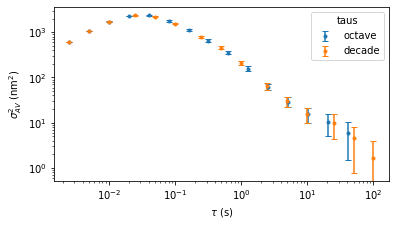

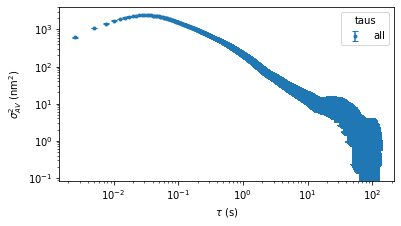

In [12]:
fig = plt.figure()
for taus in ['octave','decade']:
    av = AV(trace,fsample=fsample,taus=taus)
    fig,ax = av.plot(fig=fig,data_label=taus)
ax[0].legend(title='taus')
fig = plt.figure()
av = AV(trace,fsample=fsample,taus='all')
fig,ax = av.plot(fig=fig, data_label = 'all')
ax[0].legend(title='taus')

# Incorporating tracking errors 

Occasionally, tracking errors will show up in the data as high frequency gaussian noise.

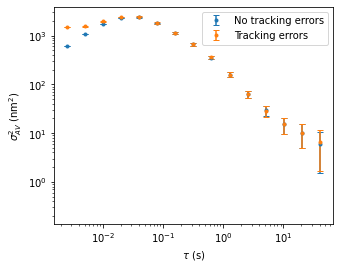

In [31]:
trace_te = trace + np.random.normal(loc=0,scale=30,size=N)
fig,ax = AV(trace,400).plot(data_label='No tracking errors')
AV(trace_te,400).plot(fig=fig,data_label='Tracking errors')
ax[0].legend()

These tracking errors can be fit in the following manner.

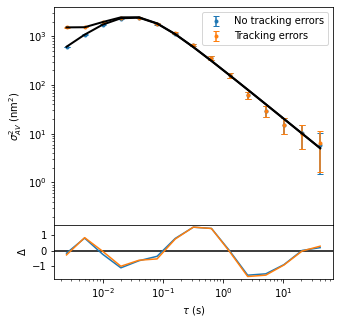

In [37]:
av = AV(trace,400)
av.mlefit(tracking_error=True)
fig,ax = av.plot(data_label='No tracking errors')
av = AV(trace_te,400)
av.mlefit(tracking_error=True)
av.plot(fig=fig,data_label='Tracking errors')
ax[0].legend()

If you know what the tracking error is, you can fix the parameter during the fitting.

(<Figure size 360x360 with 2 Axes>,
 [<Axes: ylabel='$\\sigma_{AV}^2$ (nm$^2$)'>,
  <Axes: xlabel='$\\tau$ (s)', ylabel='$\\Delta$'>])

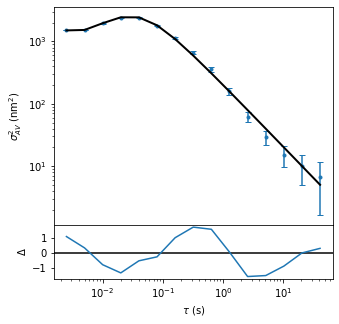

In [42]:
av = AV(trace_te,400)
av.mlefit(tracking_error=True,epsilon=30)
av.plot(data_label='Tracking errors')